In [1]:
from PIL import Image, ImageChops, ImageFilter
import sys
import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [2]:
def entropia(q):

    #Obtención matrices de color

    img2 = plt.imread(q) #Lee la imágen en matrices de capas de colores

    c = np.shape(img2)

    g = list(img2[:,:,0]) #Capa verde
    r = list(img2[:,:,1]) #Capa roja
    b = list(img2[:,:,2]) #Capa azul

    #Divide una matriz de color en matrices 2x2

    lis = [] #Contiene números que conformarían matrices 2x2

    a = g

    for row in range(int(c[0])-1):

        if row%2 == 0: #Evita sobrelapamiento

            for column in range(int(c[1])-1):

                if column%2 == 0: #Evita sobrelapamiento

                    lista = [a[row][column],a[row][column+1],a[row+1][column],a[row+1][column+1]] #convierte en lista con info de matriz

                    lis.append(lista)

    #Cuenta con diccionarios

    conteos={'{}'.format([0,1,2,3]):0,'{}'.format([0,3,2,1]):0,'{}'.format([0,2,1,3]):0,'{}'.format([0,1,3,2]):0,
             '{}'.format([0,3,1,2]):0,'{}'.format([0,2,3,1]):0,'{}'.format([1,0,2,3]):0,'{}'.format([1,0,3,2]):0,
             '{}'.format([1,2,0,3]):0,'{}'.format([1,2,3,0]):0,'{}'.format([1,3,0,2]):0,'{}'.format([1,3,2,0]):0,
             '{}'.format([2,0,1,3]):0,'{}'.format([2,0,3,1]):0,'{}'.format([2,1,0,3]):0,'{}'.format([2,1,3,0]):0,
             '{}'.format([2,3,1,0]):0,'{}'.format([2,3,0,1]):0,'{}'.format([3,0,1,2]):0,'{}'.format([3,0,2,1]):0,
             '{}'.format([3,1,0,2]):0,'{}'.format([3,1,2,0]):0,'{}'.format([3,2,1,0]):0,'{}'.format([3,2,0,1]):0}

    for i in range(len(lis)):

        k = lis[i]

        pos = list(np.argsort(k)) #Organiza índices

        lis[i] = '{}'.format(pos)

        conteos[lis[i]] += 1

    conteo = list(conteos.values())

    print(conteo)

    x = np.arange(24)

    plt.figure(figsize=(8,8))

    plt.bar(x, height=conteo)
    plt.xticks(x, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
    plt.ylabel('Frecuencia')
    plt.xlabel('Permutación')
    plt.title('Frecuencia vs Permutaciones')
    plt.savefig('Histograma.png')

    #Calcula entropía

    entro = 0

    for i in conteo:

        if i != 0:

            entro += (i/len(lis))*np.log(1/(i/len(lis)))

    print('\n La entropía de', q,'es:', entro/np.log(24))
    
    return entro/np.log(24)

[9962, 454, 7491, 3191, 789, 3129, 3033, 6522, 735, 1085, 7839, 2486, 3255, 6989, 506, 757, 2628, 7787, 1069, 681, 2298, 6502, 5292, 2440]

 La entropía de Imágenes\Microscopía\microscopía.PNG es: 0.9022618783838315


0.9022618783838315

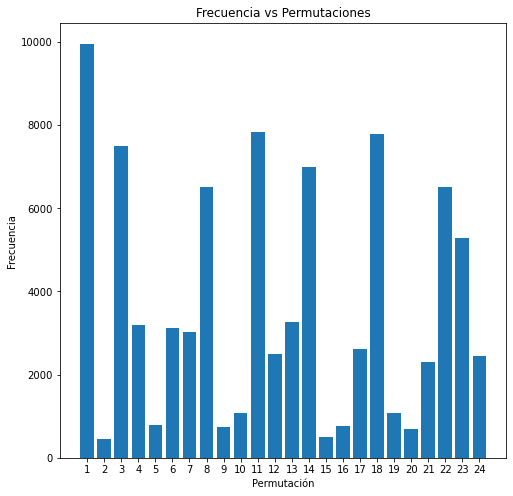

In [3]:
entropia('Imágenes\Microscopía\microscopía.PNG')

[3997, 46, 699, 431, 77, 272, 466, 853, 64, 121, 867, 205, 266, 493, 40, 54, 306, 1612, 109, 49, 172, 444, 561, 292]

 La entropía de Imágenes/Otros/descarga.jpg es: 0.7809439458740561
[3997, 46, 699, 431, 77, 272, 466, 853, 64, 121, 867, 205, 266, 493, 40, 54, 306, 1612, 109, 49, 172, 444, 561, 292]

 La entropía de descarga.png es: 0.7809439458740561
[3988, 49, 766, 447, 73, 238, 490, 830, 82, 116, 880, 201, 243, 456, 41, 51, 297, 1588, 114, 47, 199, 440, 563, 297]

 La entropía de descarga.jpeg es: 0.7818155076401757


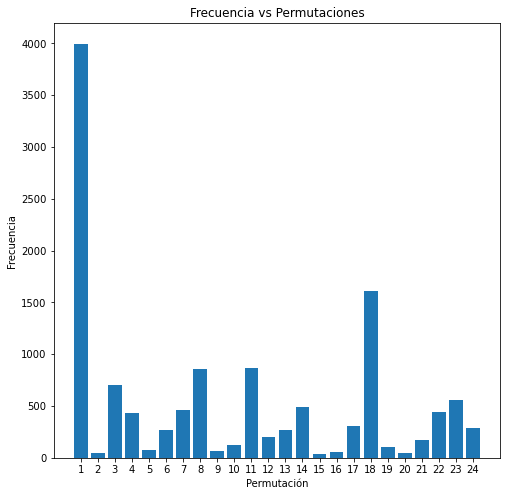

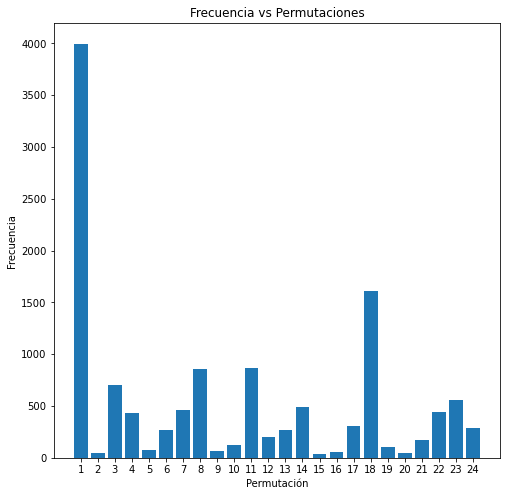

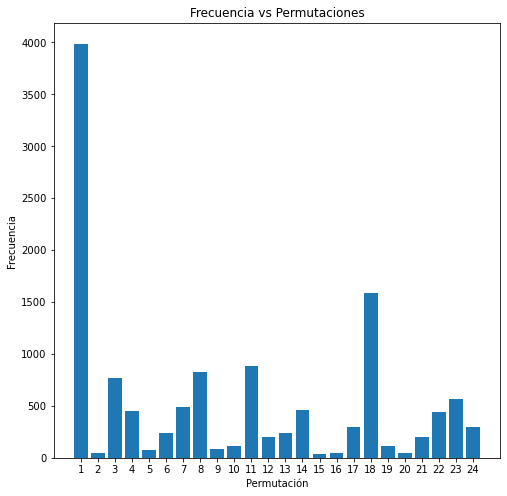

In [4]:
#Prueba de formato--------------------------------------------------------------------------------------------------------------

jpg = Image.open('Imágenes/Otros/descarga.jpg')

jpg.save('descarga.png','png') 
jpg.save('descarga.jpeg','jpeg')

jpg = Image.open('Imágenes/Otros/descarga2.jpg')

jpg.save('descarga2.jpg','png') 
jpg.save('descarga2.jpeg','jpeg')
jpg.save('descarga2.PNG','PNG')

jpg = Image.open('Imágenes/Rostros/rostro.jpg')

jpg.save('rostro.png','png') 
jpg.save('rostro.jpeg','jpeg')
jpg.save('rostro.PNG','PNG')

##### Para descarga--------------------------------------------------------------------------------------

desc_jpg = entropia('Imágenes/Otros/descarga.jpg')
desc_png = entropia('descarga.png')
desc_jpeg = entropia('descarga.jpeg')

[682, 442, 553, 583, 529, 571, 532, 550, 469, 494, 586, 479, 554, 495, 442, 434, 499, 628, 515, 454, 497, 544, 501, 483]

 La entropía de Imágenes/Otros/descarga2.jpg es: 0.9979963692603759
[682, 442, 553, 583, 529, 571, 532, 550, 469, 494, 586, 479, 554, 495, 442, 434, 499, 628, 515, 454, 497, 544, 501, 483]

 La entropía de descarga2.png es: 0.9979963692603759
[695, 460, 552, 597, 516, 542, 539, 564, 495, 493, 538, 494, 523, 493, 435, 448, 521, 599, 535, 461, 513, 506, 486, 511]

 La entropía de descarga2.jpeg es: 0.998349131437517


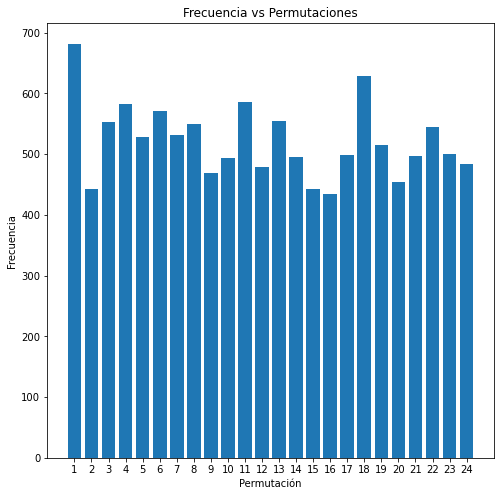

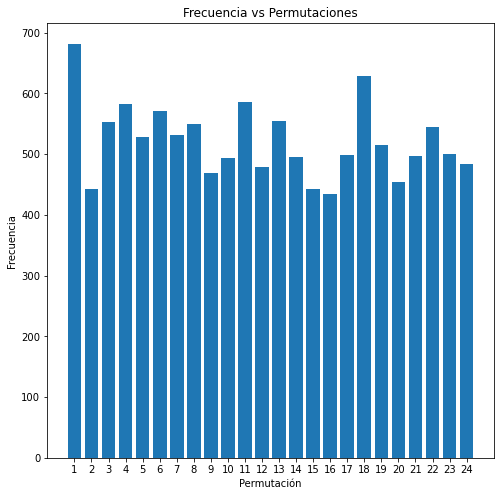

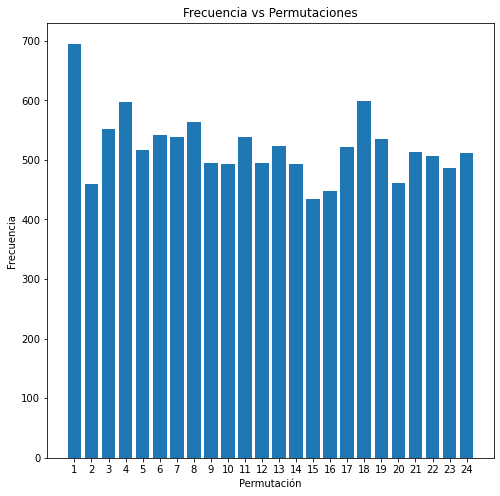

In [5]:
#### Para descarga2--------------------------------------------------------------------------------------

desc2_jpg = entropia('Imágenes/Otros/descarga2.jpg')
desc2_png = entropia('descarga2.png')
desc2_jpeg = entropia('descarga2.jpeg')

[3258, 45, 1707, 399, 73, 528, 379, 759, 69, 181, 1923, 299, 521, 846, 32, 61, 180, 826, 178, 54, 283, 765, 356, 202]

 La entropía de Imágenes/Rostros/rostro.jpg es: 0.8149990026548097
[3258, 45, 1707, 399, 73, 528, 379, 759, 69, 181, 1923, 299, 521, 846, 32, 61, 180, 826, 178, 54, 283, 765, 356, 202]

 La entropía de rostro.png es: 0.8149990026548097
[2796, 43, 1837, 432, 79, 509, 397, 756, 79, 175, 2000, 326, 469, 895, 48, 66, 196, 850, 196, 62, 340, 746, 417, 210]

 La entropía de rostro.jpeg es: 0.8313954920738608


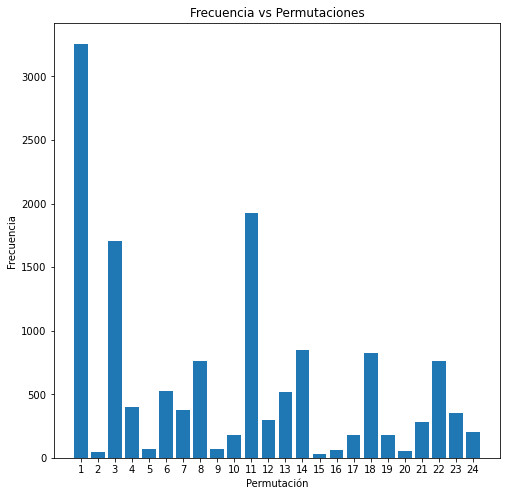

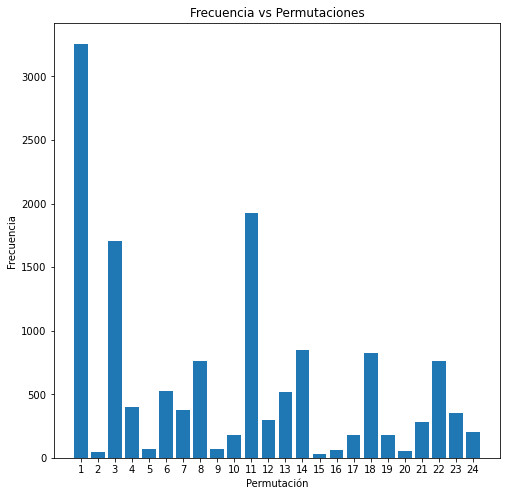

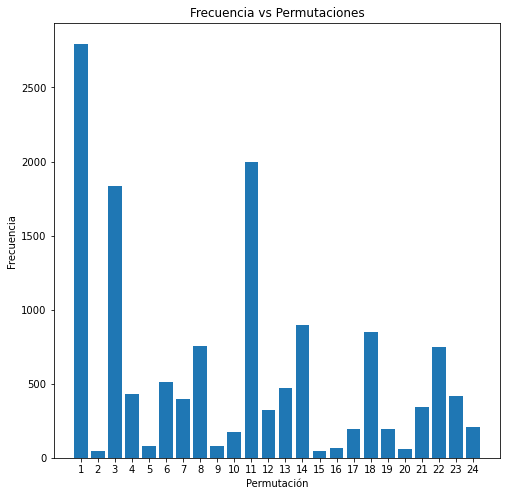

In [6]:
### Para rostro-----------------------------------------------------------------------------------------

ros_jpg = entropia('Imágenes/Rostros/rostro.jpg')
ros_png = entropia('rostro.png')
ros_jpeg = entropia('rostro.jpeg')

[3997, 46, 699, 431, 77, 272, 466, 853, 64, 121, 867, 205, 266, 493, 40, 54, 306, 1612, 109, 49, 172, 444, 561, 292]

 La entropía de descarga.png es: 0.7809439458740561
[3258, 45, 1707, 399, 73, 528, 379, 759, 69, 181, 1923, 299, 521, 846, 32, 61, 180, 826, 178, 54, 283, 765, 356, 202]

 La entropía de rostro.png es: 0.8149990026548097
[682, 442, 553, 583, 529, 571, 532, 550, 469, 494, 586, 479, 554, 495, 442, 434, 499, 628, 515, 454, 497, 544, 501, 483]

 La entropía de descarga2.png es: 0.9979963692603759


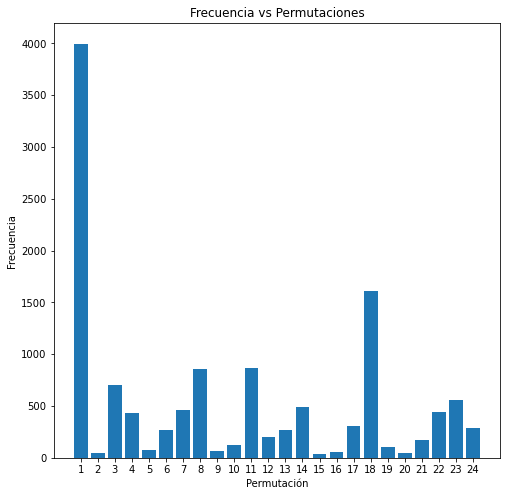

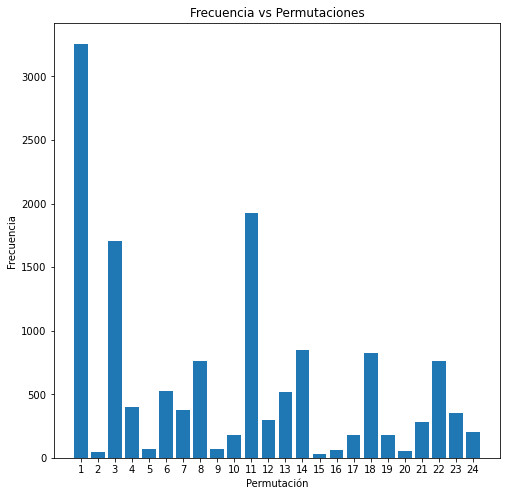

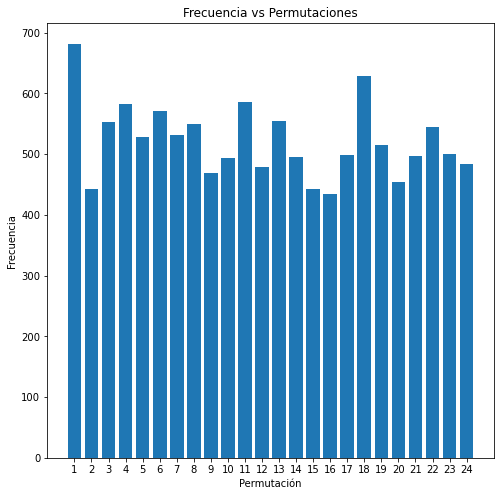

In [7]:
#Prueba de capas de color:

#Capa g para todas las figuras

desc_g = entropia('descarga.png')
ros_g = entropia('rostro.png')
desc2_g = entropia('descarga2.png')

In [8]:
def entropia(q):

    #Obtención matrices de color

    img2 = plt.imread(q) #Lee la imágen en matrices de capas de colores

    c = np.shape(img2)

    g = list(img2[:,:,0]) #Capa verde
    r = list(img2[:,:,1]) #Capa roja
    b = list(img2[:,:,2]) #Capa azul

    #Divide una matriz de color en matrices 2x2

    lis = [] #Contiene números que conformarían matrices 2x2

    a = r

    for row in range(int(c[0])-1):

        if row%2 == 0: #Evita sobrelapamiento

            for column in range(int(c[1])-1):

                if column%2 == 0: #Evita sobrelapamiento

                    lista = [a[row][column],a[row][column+1],a[row+1][column],a[row+1][column+1]] #convierte en lista con info de matriz

                    lis.append(lista)

    #Cuenta con diccionarios

    conteos={'{}'.format([0,1,2,3]):0,'{}'.format([0,3,2,1]):0,'{}'.format([0,2,1,3]):0,'{}'.format([0,1,3,2]):0,
             '{}'.format([0,3,1,2]):0,'{}'.format([0,2,3,1]):0,'{}'.format([1,0,2,3]):0,'{}'.format([1,0,3,2]):0,
             '{}'.format([1,2,0,3]):0,'{}'.format([1,2,3,0]):0,'{}'.format([1,3,0,2]):0,'{}'.format([1,3,2,0]):0,
             '{}'.format([2,0,1,3]):0,'{}'.format([2,0,3,1]):0,'{}'.format([2,1,0,3]):0,'{}'.format([2,1,3,0]):0,
             '{}'.format([2,3,1,0]):0,'{}'.format([2,3,0,1]):0,'{}'.format([3,0,1,2]):0,'{}'.format([3,0,2,1]):0,
             '{}'.format([3,1,0,2]):0,'{}'.format([3,1,2,0]):0,'{}'.format([3,2,1,0]):0,'{}'.format([3,2,0,1]):0}

    for i in range(len(lis)):

        k = lis[i]

        pos = list(np.argsort(k)) #Organiza índices

        lis[i] = '{}'.format(pos)

        conteos[lis[i]] += 1

    conteo = list(conteos.values())

    print(conteo)

    x = np.arange(24)

    plt.figure(figsize=(8,8))

    plt.bar(x, height=conteo)
    plt.xticks(x, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
    plt.ylabel('Frecuencia')
    plt.xlabel('Permutación')
    plt.title('Frecuencia vs Permutaciones')
    plt.savefig('Histograma.png')

    #Calcula entropía

    entro = 0

    for i in conteo:

        if i != 0:

            entro += (i/len(lis))*np.log(1/(i/len(lis)))

    print('\n La entropía de', q,'es:', entro/np.log(24))
    
    return entro/np.log(24)

[4246, 54, 634, 564, 118, 331, 531, 634, 95, 167, 694, 178, 308, 412, 54, 80, 367, 1445, 144, 61, 220, 405, 408, 346]

 La entropía de descarga.png es: 0.7886430624182889
[3294, 42, 1743, 401, 61, 539, 401, 723, 68, 182, 1778, 305, 519, 891, 31, 58, 179, 843, 179, 52, 291, 778, 380, 186]

 La entropía de rostro.png es: 0.8152546860061051
[674, 435, 546, 571, 515, 564, 550, 562, 458, 482, 587, 484, 564, 496, 449, 437, 494, 617, 525, 460, 504, 550, 500, 492]

 La entropía de descarga2.png es: 0.9980948959400124


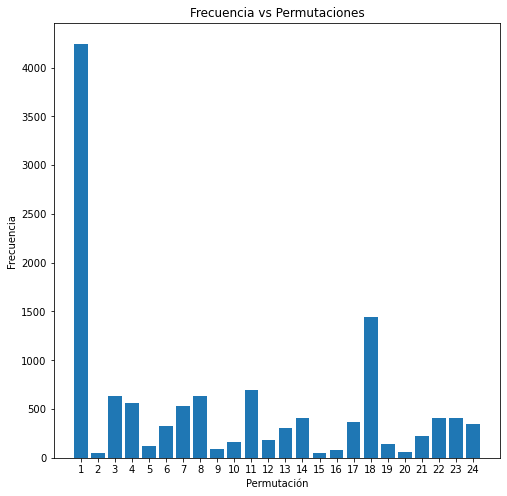

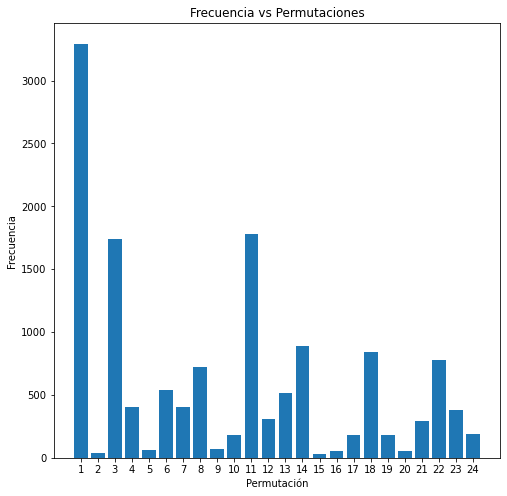

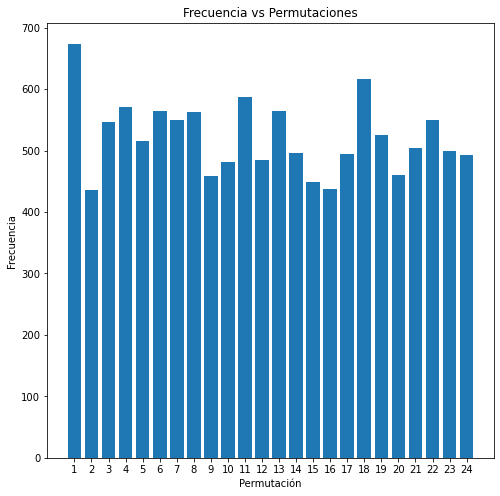

In [9]:
#Prueba de capas de color:

#Capa r para todas las figuras

desc_r = entropia('descarga.png')
ros_r = entropia('rostro.png')
desc2_r = entropia('descarga2.png')

In [10]:
def entropia(q):

    #Obtención matrices de color

    img2 = plt.imread(q) #Lee la imágen en matrices de capas de colores

    c = np.shape(img2)

    g = list(img2[:,:,0]) #Capa verde
    r = list(img2[:,:,1]) #Capa roja
    b = list(img2[:,:,2]) #Capa azul

    #Divide una matriz de color en matrices 2x2

    lis = [] #Contiene números que conformarían matrices 2x2

    a = b

    for row in range(int(c[0])-1):

        if row%2 == 0: #Evita sobrelapamiento

            for column in range(int(c[1])-1):

                if column%2 == 0: #Evita sobrelapamiento

                    lista = [a[row][column],a[row][column+1],a[row+1][column],a[row+1][column+1]] #convierte en lista con info de matriz

                    lis.append(lista)

    #Cuenta con diccionarios

    conteos={'{}'.format([0,1,2,3]):0,'{}'.format([0,3,2,1]):0,'{}'.format([0,2,1,3]):0,'{}'.format([0,1,3,2]):0,
             '{}'.format([0,3,1,2]):0,'{}'.format([0,2,3,1]):0,'{}'.format([1,0,2,3]):0,'{}'.format([1,0,3,2]):0,
             '{}'.format([1,2,0,3]):0,'{}'.format([1,2,3,0]):0,'{}'.format([1,3,0,2]):0,'{}'.format([1,3,2,0]):0,
             '{}'.format([2,0,1,3]):0,'{}'.format([2,0,3,1]):0,'{}'.format([2,1,0,3]):0,'{}'.format([2,1,3,0]):0,
             '{}'.format([2,3,1,0]):0,'{}'.format([2,3,0,1]):0,'{}'.format([3,0,1,2]):0,'{}'.format([3,0,2,1]):0,
             '{}'.format([3,1,0,2]):0,'{}'.format([3,1,2,0]):0,'{}'.format([3,2,1,0]):0,'{}'.format([3,2,0,1]):0}

    for i in range(len(lis)):

        k = lis[i]

        pos = list(np.argsort(k)) #Organiza índices

        lis[i] = '{}'.format(pos)

        conteos[lis[i]] += 1

    conteo = list(conteos.values())

    print(conteo)

    x = np.arange(24)

    plt.figure(figsize=(8,8))

    plt.bar(x, height=conteo)
    plt.xticks(x, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
    plt.ylabel('Frecuencia')
    plt.xlabel('Permutación')
    plt.title('Frecuencia vs Permutaciones')
    plt.savefig('Histograma.png')

    #Calcula entropía

    entro = 0

    for i in conteo:

        if i != 0:

            entro += (i/len(lis))*np.log(1/(i/len(lis)))

    print('\n La entropía de', q,'es:', entro/np.log(24))
    
    return entro/np.log(24)

[4126, 58, 678, 491, 96, 319, 476, 622, 88, 164, 751, 185, 311, 441, 59, 82, 368, 1561, 148, 69, 212, 381, 438, 372]

 La entropía de descarga.png es: 0.7913171186611534
[3498, 45, 1637, 413, 73, 544, 386, 724, 75, 193, 1721, 333, 520, 836, 31, 60, 185, 800, 180, 49, 295, 728, 389, 209]

 La entropía de rostro.png es: 0.8147672554075683
[656, 443, 546, 577, 512, 562, 557, 572, 450, 482, 590, 489, 558, 490, 445, 442, 499, 605, 525, 448, 513, 551, 511, 493]

 La entropía de descarga2.png es: 0.9982030473337992


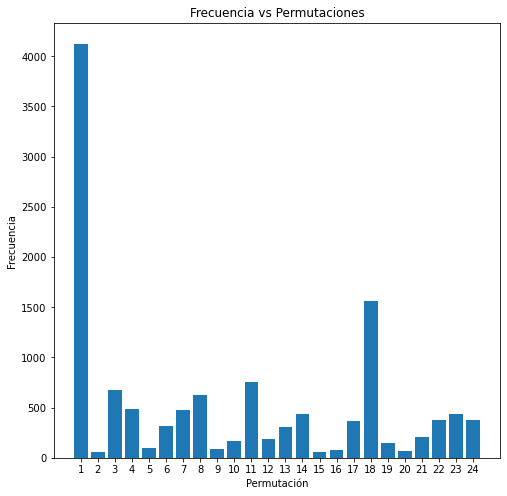

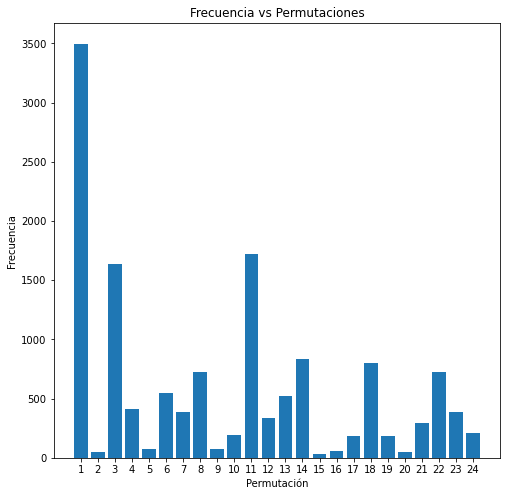

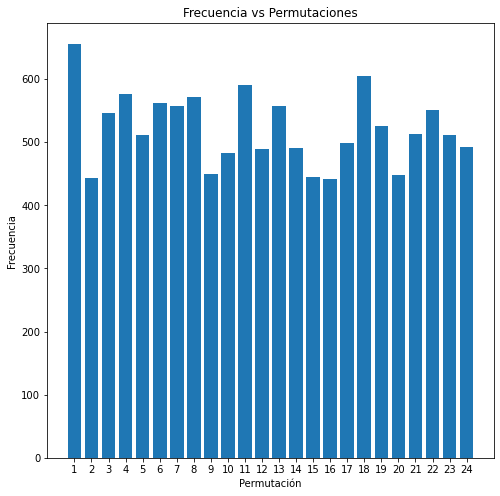

In [11]:
#Prueba de capas de color:

#Capa b para todas las figuras

desc_b = entropia('descarga.png')
ros_b = entropia('rostro.png')
desc2_b = entropia('descarga2.png')